In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('features_v2.csv')
names = ['authorID','NumLink','hastags','spCount','word_count','char_count','isCapitalize','RT_count']
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:,1].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
#dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y=encoded_Y
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.30,random_state=42)
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu')) # input dimension = dimension of festure vector
model.add(Dense(6, activation='relu'))
model.add(Dense(10000, activation='softmax')) # output layer = no. of classes
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_histt = model.fit(X_train, y_train, epochs=30, batch_size=256, verbose=1)






Epoch 1/30
229736/229736 [==============================] - 69s 299us/step - loss: 8.9531 - acc: 7.2692e-04
Epoch 2/30
229736/229736 [==============================] - 68s 295us/step - loss: 8.6870 - acc: 0.0015
Epoch 3/30
229736/229736 [==============================] - 68s 297us/step - loss: 8.5948 - acc: 0.0020
Epoch 4/30
229736/229736 [==============================] - 68s 298us/step - loss: 8.5594 - acc: 0.0022
Epoch 5/30
229736/229736 [==============================] - 69s 302us/step - loss: 8.5324 - acc: 0.0023
Epoch 6/30
229736/229736 [==============================] - 70s 306us/step - loss: 8.5078 - acc: 0.0023
Epoch 7/30
229736/229736 [==============================] - 70s 303us/step - loss: 8.4845 - acc: 0.0029
Epoch 8/30
229736/229736 [==============================] - 70s 304us/step - loss: 8.4557 - acc: 0.0032
Epoch 9/30
229736/229736 [==============================] - 70s 304us/step - loss: 8.4225 - acc: 0.0037
Epoch 10/30
229736/229736 [==============================] -

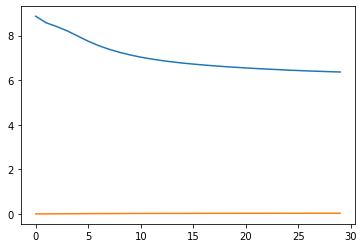

In [9]:
import pickle
filename = 'test_model_ann_epoch=30_normalized_layers=12.sav'
pickle.dump(model, open(filename, 'wb'))



import matplotlib.pyplot as plt
plt.plot(train_histt.history['loss'])
plt.plot(train_histt.history['acc'])
plt.show()



In [7]:
scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss=%s'% scores[0])
print('Test accuracy=%s'% scores[1])

65639/65639 [==============================] - 78s 1ms/step
Test loss=6.529046359573837
Test accuracy=0.030286872133944757


In [8]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

dataset = pd.read_csv('un_features_v1.csv')
names = [ 'row_id','spCount','hastags','word_count','char_count','isCapitalize','RT_rate']
X = dataset.iloc[0:, 1:].values
len(X)
y_predict=model.predict(X)




In [3]:
import numpy as np

pred = list()
for i in range(len(y_predict)):
    pred.append(np.argmax(y_predict[i]))
#decoding
y_output = encoder.inverse_transform(pred)
y_output

NameError: name 'y_predict' is not defined

In [ ]:
len()

In [2]:
result = []
for i in range(0,len(y_output)-1):
    result.append(y_output[i])
len(result)
    #resDF = pd.DataFrame(result)

NameError: name 'y_output' is not defined

In [8]:
resDF.to_csv("unlabelled_prediction.csv")

In [85]:
y_predict

array([[0.0000000e+00, 3.7083769e-12, 1.3830452e-11, ..., 1.6815704e-37,
        5.3666552e-37, 5.1293443e-37],
       [0.0000000e+00, 6.8083104e-12, 1.7400791e-11, ..., 4.0814977e-37,
        1.5344296e-36, 1.3854169e-36],
       [0.0000000e+00, 1.8075539e-11, 5.9684764e-11, ..., 4.6849663e-35,
        1.5254434e-34, 1.3124485e-34],
       ...,
       [0.0000000e+00, 8.6472877e-12, 9.9087388e-12, ..., 6.3872879e-37,
        2.5774427e-36, 2.2528413e-36],
       [0.0000000e+00, 1.7306252e-12, 1.3639458e-10, ..., 9.3331001e-36,
        4.1154760e-35, 3.6682079e-35],
       [0.0000000e+00, 8.0468765e-12, 8.9152769e-11, ..., 7.9459767e-33,
        3.0577162e-32, 2.5310512e-32]], dtype=float32)

In [88]:
encoded_Y = encoder.fit_transform(y)

In [89]:
encoded_Y

array([8137, 8137, 8137, ..., 4029, 4029, 4029], dtype=int64)